In [15]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [16]:
# Do not remove or edit the line below:
filename = os.path.join(os.getcwd(), "data", "diabetes.csv")

In [17]:
# Load the diabetes dataset
df = pd.read_csv("diabetes.csv", header=0)

In [18]:
# Inspect the data
print(df.shape)
print(list(df.columns))
print(df.head())

(768, 9)
['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [19]:
# Define features (X) and the target label (y)
y = df['Outcome']  # Target column
X = df.drop(columns=['Outcome'])  # All columns except the target


In [34]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=123)

In [41]:
# Define a function to train and test a Decision Tree classifier
def train_test_DT(X_train, X_test, y_train, y_test, depth, crit='entropy'):
    """
    Train and test a Decision Tree Classifier.

    Parameters:
    X_train, X_test, y_train, y_test: Split datasets for training and testing
    depth: Maximum depth of the decision tree
    crit: Criterion for split ('entropy' or 'gini')

    Returns:
    acc_score: Accuracy of the model on the test set
    model: Trained Decision Tree Classifier
    """
    clf = DecisionTreeClassifier(criterion=crit, max_depth=depth, random_state=1234)
    clf.fit(X_train, y_train)  # Train the model
    class_label_predictions = clf.predict(X_test)  # Predict on the test set
    acc_score = accuracy_score(y_test, class_label_predictions)  # Compute accuracy
    return acc_score, clf

# Train the Decision Tree Classifier
accuracy, clf = train_test_DT(X_train, X_test, y_train, y_test, depth=3)

# Export and print the text representation of the tree
text_representation = tree.export_text(clf, feature_names=list(X.columns))
print("Text Representation of the Decision Tree:")
print(text_representation)

# Evaluate the classifier on the test data
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the Decision Tree Classifier: {accuracy:.2f}")


Text Representation of the Decision Tree:
|--- Glucose <= 123.50
|   |--- BMI <= 26.45
|   |   |--- DiabetesPedigreeFunction <= 0.68
|   |   |   |--- class: 0
|   |   |--- DiabetesPedigreeFunction >  0.68
|   |   |   |--- class: 0
|   |--- BMI >  26.45
|   |   |--- Age <= 30.50
|   |   |   |--- class: 0
|   |   |--- Age >  30.50
|   |   |   |--- class: 0
|--- Glucose >  123.50
|   |--- Glucose <= 166.50
|   |   |--- BMI <= 30.00
|   |   |   |--- class: 0
|   |   |--- BMI >  30.00
|   |   |   |--- class: 1
|   |--- Glucose >  166.50
|   |   |--- BMI <= 27.25
|   |   |   |--- class: 1
|   |   |--- BMI >  27.25
|   |   |   |--- class: 1

Accuracy of the Decision Tree Classifier: 0.77


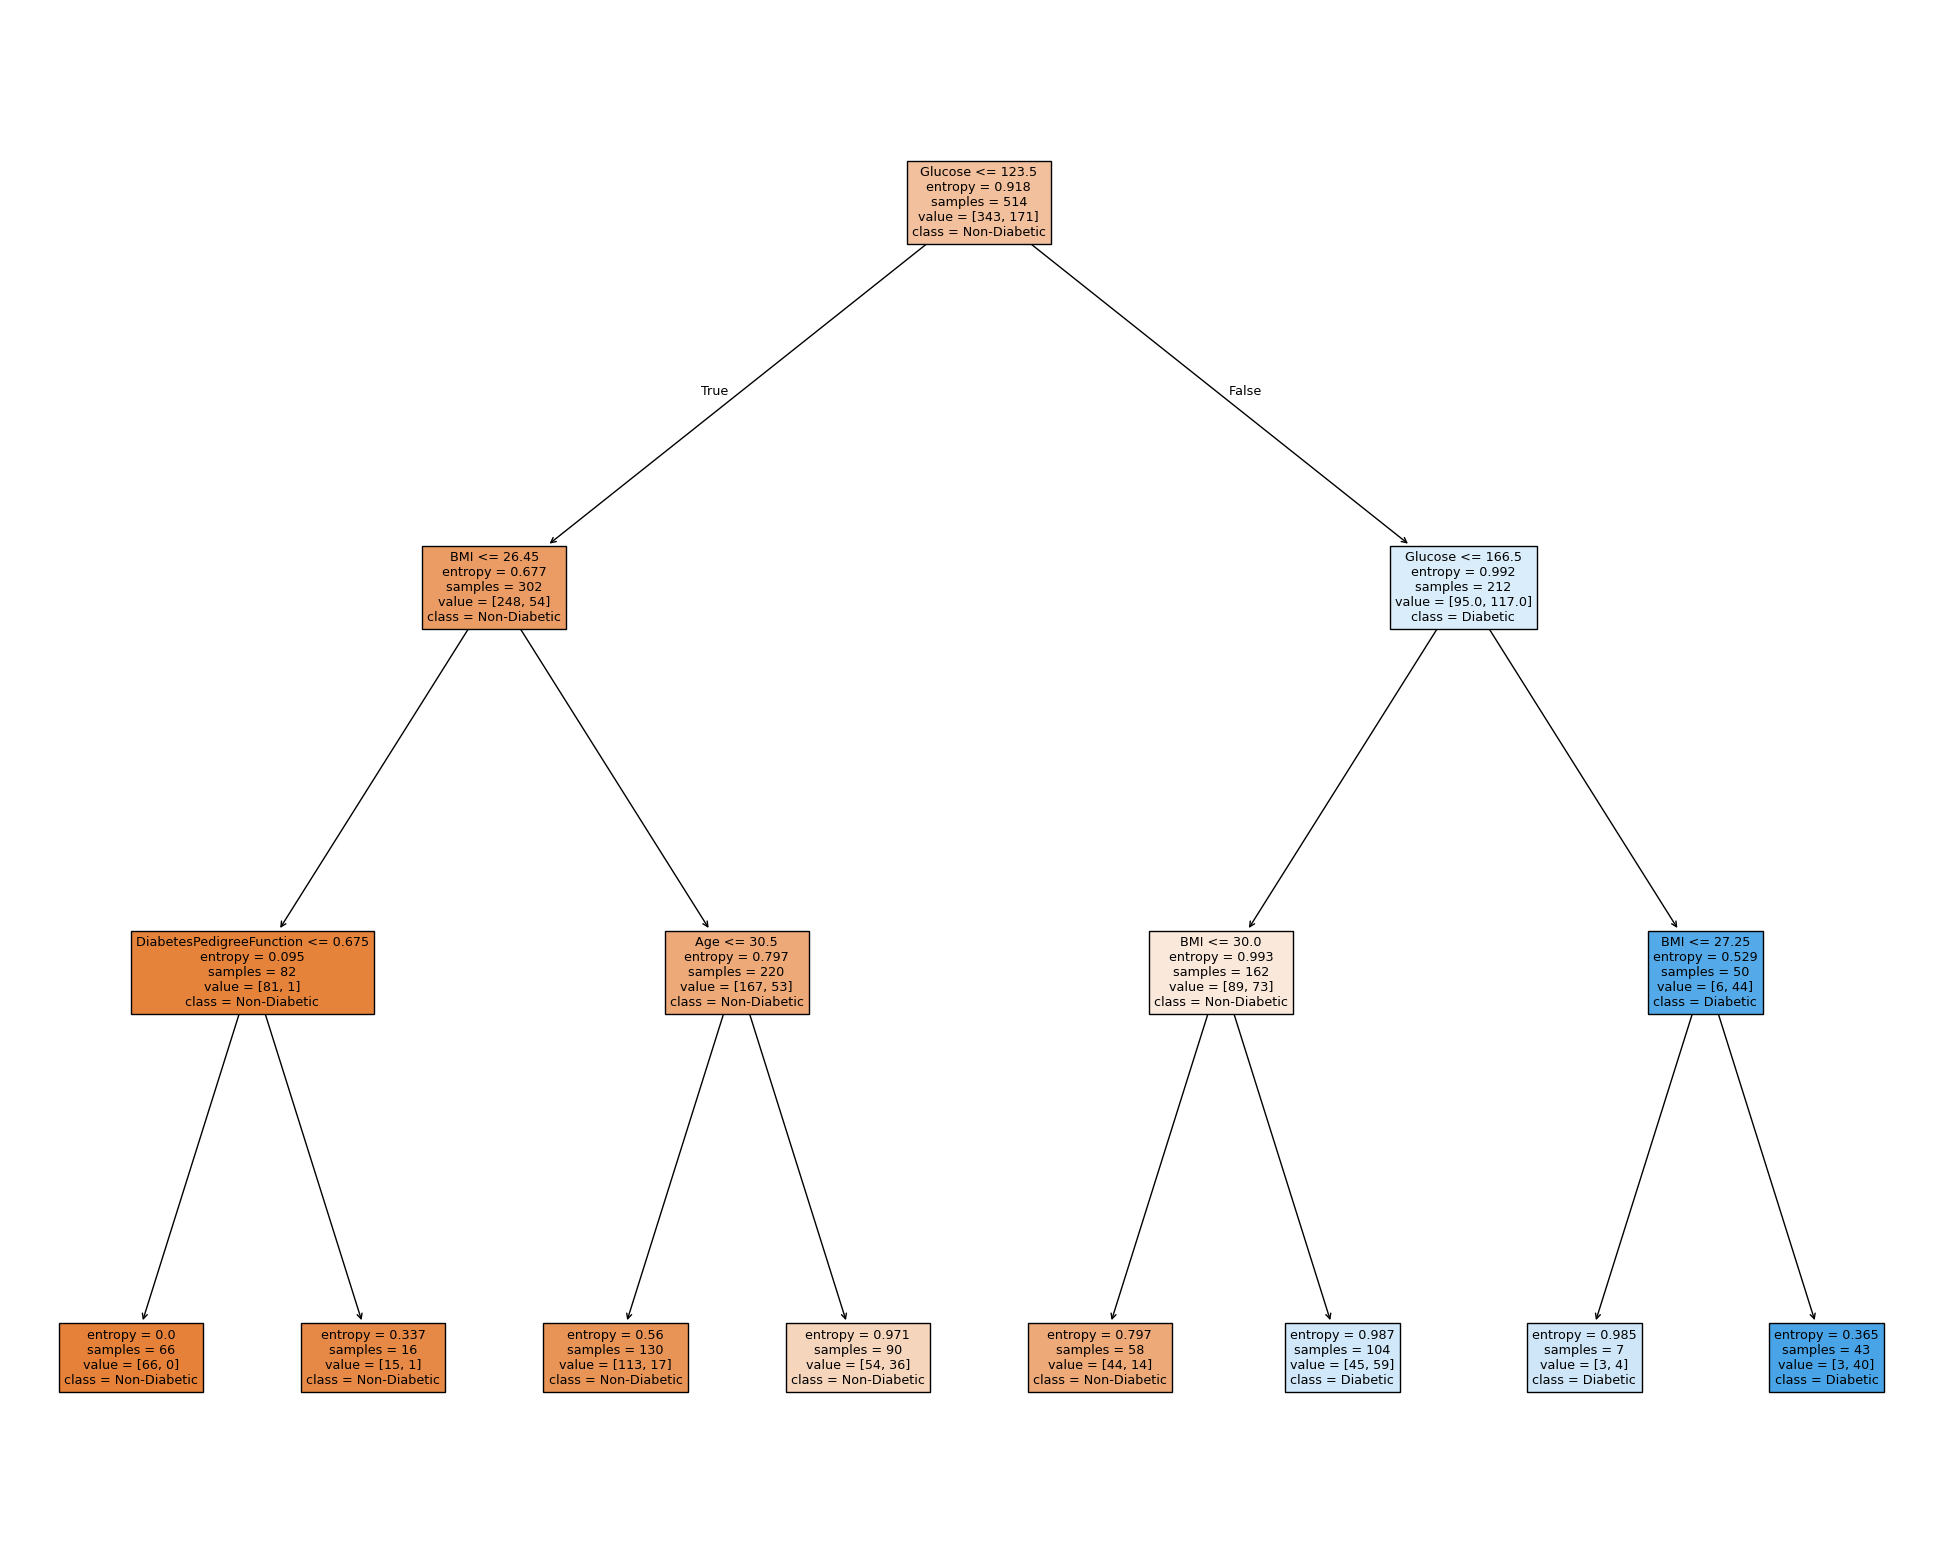

In [42]:
import matplotlib.pyplot as plt
from sklearn import tree

# Visualize the Decision Tree
fig = plt.figure(figsize=(25, 20))
_ = tree.plot_tree(
    clf,
    feature_names=X.columns,  # Use feature names from your diabetes dataset
    class_names=['Non-Diabetic', 'Diabetic'],  # Class names for binary classification
    filled=True
)
plt.show()